In [43]:
import urllib.request
import simplejson as json
import pandas as pd
import dateutil.parser
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from data_from_planetos_pointAPI import get_data_from_point_API,get_units
from bokeh.charts import Line, show, TimeSeries
from bokeh.io import output_notebook
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
dataset_key = 'chg_chirps_global_05'
API_key = open('APIKEY').read().strip()
#palo alto
latitude = 37.425713
longitude = -122.17

In [4]:
data = get_data_from_point_API(dataset_key, longitude, latitude, API_key)
print (data.keys())
unit = get_units(dataset_key,'precip',API_key)
time = pd.to_datetime(data['time'])

Index(['context', 'axes', 'latitude', 'longitude', 'time', 'precip'], dtype='object')


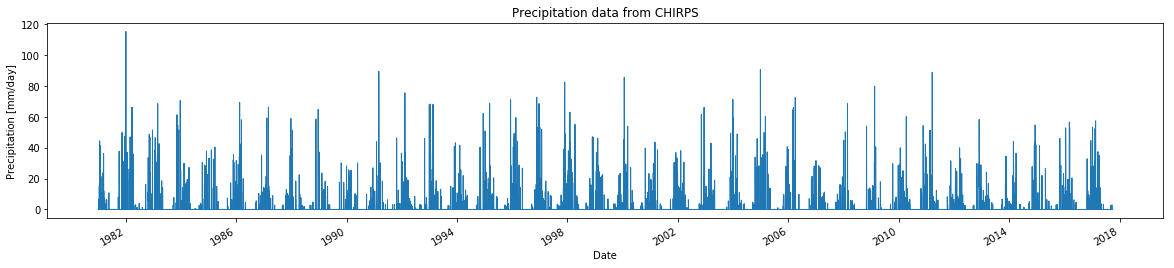

In [5]:
fig = plt.figure(figsize=(20,4))
plt.plot(time, data['precip'], '-',linewidth = 1) 
fig.autofmt_xdate()
plt.xlabel('Date')
plt.title('Precipitation data from CHIRPS')
plt.ylabel('Precipitation [' + unit + ']')
plt.show()

In [49]:
output_notebook()
plot_data = {'precip':list(data['precip']),'time':list(time)}
p = TimeSeries(plot_data,x='time', title="Precipitation data from CHIRPS", xlabel='Date' , ylabel='Precipitation [' + unit + ']', width=900, height=400,legend=False)
show(p)

Loading BokehJS ...

In [6]:
def running_mean(x, N):
    cumsum = numpy.cumsum(numpy.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

In [22]:
N = 365
data_mean = running_mean(numpy.array(data['precip']),N)
time_mean = numpy.linspace(numpy.min(time).value,numpy.max(time).value,len(data_mean))
time_mean = pd.to_datetime(time_mean)

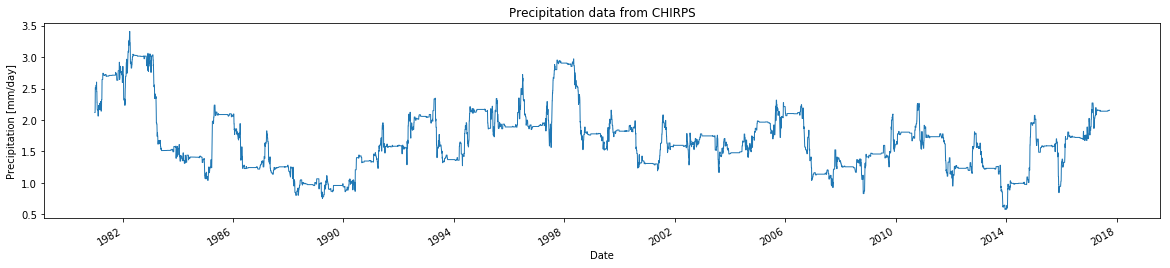

In [23]:
fig = plt.figure(figsize=(20,4))
plt.plot(time_mean, data_mean, '-',linewidth = 1) 
fig.autofmt_xdate()
plt.xlabel('Date')
plt.title('Precipitation data from CHIRPS')
plt.ylabel('Precipitation [' + unit + ']')
plt.show()